In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def polynomialRegression(degree):
    """将通过管道后的模型封装成一个函数  返回线性回归模型"""
    
    #使用管道
    return Pipeline([
        ("poly_feat",PolynomialFeatures(degree=degree)),
        ("standard_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

### 加载数据集

In [4]:
x = np.random.uniform(-3,3,size=100)

X = x.reshape(-1,1)

y = 0.5 * x*x + x + 2 + np.random.normal(0,1,size=100)  

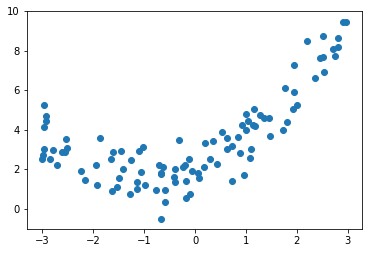

In [5]:
plt.scatter(X,y)
plt.show()

### 分割数据集

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

### 线性回归（模型是underfitting的）

In [26]:
test_score = []
train_score = []
for i in range(1,len(X_train)):
    lr = LinearRegression()
    lr.fit(X_train[:i],y_train[:i])
    y_p = lr.predict(X_test)
    test_score.append(mean_squared_error(y_test,y_p))
    y_p_train = lr.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i],y_p_train))


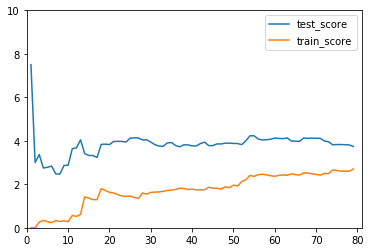

In [27]:
plt.plot([ i for i in range(1,len(X_train))],test_score,label="test_score")
plt.plot([ i for i in range(1,len(X_train))],train_score,label="train_score")
plt.axis([0,len(X_train)+1,0,10])
plt.legend()
plt.show()

In [42]:
lr = polynomialRegression(2)
lr.fit(X_train,y_train)
y_p = lr.predict(X_test)
sss = mean_squared_error(y_test,y_p)

### 将上述画图过程封装成一个函数

In [48]:
def plot_learning_curve(model,X_train,X_test,y_train,y_test):
    test_score = []
    train_score = []
    for i in range(1,len(X_train)):
        lr = model
        lr.fit(X_train[:i],y_train[:i])
        y_p = lr.predict(X_test)
        test_score.append(mean_squared_error(y_test,y_p))
        y_p_train = lr.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_p_train))
        
    plt.plot([i for i in range(1,len(X_train))],[sss for i in range(1,len(X_train))],label="perfect")
    plt.plot([ i for i in range(1,len(X_train))],test_score,label="test_score")
    plt.plot([ i for i in range(1,len(X_train))],train_score,label="train_score")
    plt.axis([0,len(X_train)+1,0,6])
    plt.legend()
    plt.show()

### 画图比较

#### 1.线性回归

##### 欠拟合的例子

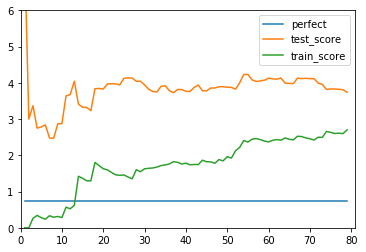

In [49]:
plot_learning_curve(LinearRegression(),X_train,X_test,y_train,y_test)

#### 2.多项式回归

##### 恰好的例子

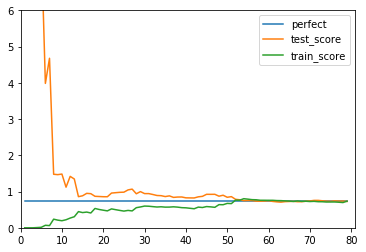

In [50]:
p_r2 = polynomialRegression(degree=2)
plot_learning_curve(p_r2,X_train,X_test,y_train,y_test)

##### 过拟合的例子

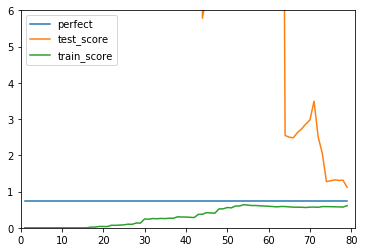

In [51]:
p_r2 = polynomialRegression(degree=15)
plot_learning_curve(p_r2,X_train,X_test,y_train,y_test)

0.72776945338211263

In [ ]:
sss